### Regression code

In [42]:
import scipy.misc
import numpy as np
from sklearn.linear_model import LinearRegression
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import csv
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import pyplot, transforms
import math

In [3]:
def linreg(x1,y1):
    model = LinearRegression()
    x1 = x1.reshape(-1, 1)
    y1 = y1.reshape(-1, 1)
    model.fit(x1, y1)
    print(f"intercept: {model.intercept_}")
    print(f"slope: {model.coef_}")
    plt.scatter(x1, y1,color='g')
    plt.plot(x1, model.predict(x1),color='k')

In [18]:

def fractal_dimension(Z, threshold=0.9):

    # Only for 2d image
    #print((Z.shape))
    assert(len(Z.shape) == 2)

    
    def boxcount(Z, k):
        S = np.add.reduceat(
            np.add.reduceat(Z, np.arange(0, Z.shape[0], k), axis=0),
                               np.arange(0, Z.shape[1], k), axis=1)

        # We count non-empty (0) and non-full boxes (k*k)
        return len(np.where((S > 0) & (S < k*k))[0])


    # Transform Z into a binary array
    Z = (Z <= threshold)

    # Minimal dimension of image
    p = min(Z.shape)
    
    #print(Z.shape)
    # Greatest power of 2 less than or equal to p
    n = 2**np.floor(np.log(p)/np.log(2))
    #print(n)
    
    # Extract the exponent
    n = int(np.log(n)/np.log(2))
    #print(n)
    # Build successive box sizes (from 2**n down to 2**1)
    sizes = 2**np.arange(n, 1, -1)
    #print(sizes)
    #print(sizes)
    # Actual box counting with decreasing size
    counts = []
    for size in sizes:
        counts.append(boxcount(Z, size))

    # Fit the successive log(sizes) with log (counts)
    
    coeffs = np.polyfit(np.log(sizes), np.log(counts), 1)
    x = np.log(sizes)
    y = np.log(counts)
    
    return -coeffs[0], x, y


#coeff, x, y  = fractal_dimension(I)
#print("Minkowski–Bouligand dimension (computed): ", coeff)
#print("Haussdorf dimension (theoretical):        ", (np.log(3)/np.log(2)))

In [19]:
def start(filename, pixel_threshold = 0.9):
    I = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    
    # testing inverse of inages
    #I = cv2.bitwise_not(I)
    #
    I = I/256
    
    
    coeff, x, y  = fractal_dimension(I, pixel_threshold)
    #print("Minkowski–Bouligand dimension (computed): ", coeff)
    return coeff, x, y

In [20]:
def save_csv(xs, ys, filename):
    data_dict = []
    for i in  range(len(xs)):
        xval = str(xs[i])
        yval = str(ys[i])
        temp = dict(xs = xval, ys = yval)
        data_dict.append(temp)

    field_names = ['xs', 'ys']
    with open(filename, 'w') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames = field_names)
        writer.writeheader()
        writer.writerows(data_dict)

In [11]:
coeff, x, y = start("./SelfSimilarFractals/koch.png")
save_csv(x, y, "./csvs/koch.csv")

(2048, 2048)
2048.0
11
[2048 1024  512  256  128   64   32   16    8    4]
Minkowski–Bouligand dimension (computed):  1.3097155996788203


In [12]:
coeff, x, y = start("./SelfSimilarFractals/SierpinskiTriangleHD.png")
save_csv(x, y, "./csvs/SierpinskiTriangleHD.csv")

(949, 1122)
512.0
9
[512 256 128  64  32  16   8   4]
Minkowski–Bouligand dimension (computed):  1.5338194415290292


In [13]:
coeff, x, y = start("./SelfSimilarFractals/kochCurve.png")
save_csv(x, y, "./csvs/kochCurve.csv")

(2340, 4680)
2048.0
11
[2048 1024  512  256  128   64   32   16    8    4]
Minkowski–Bouligand dimension (computed):  1.2718849457162957


In [14]:
coeff, x, y = start("./SelfSimilarFractals/SierpinskiTriangle50.png")
save_csv(x, y, "./csvs/SierpinskiTriangle50.csv")

(561, 474)
256.0
8
[256 128  64  32  16   8   4]
Minkowski–Bouligand dimension (computed):  1.4971725125747501


### Thresholds

In [47]:

def clean(diction):
    for key in list(diction.keys()):
        if math.isnan(diction[key]):
            del diction[key]
    return diction
            
def thresholds(file_dir):
    thresholds = np.arange(0,0.9, 0.02).tolist()
    thresholds = [round(i,2) for i in thresholds ]
    thresholds = thresholds[1:]
    thresh_dict = {}
    for i in thresholds:
        coeff, x, y  = start(file_dir, i)
        thresh_dict[i] = coeff
    thresh_dict = clean(thresh_dict)
    return thresh_dict


In [56]:
koch_thresh = thresholds("./SelfSimilarFractals/koch.png")
koch_50_thresh = thresholds("./SelfSimilarFractals/koch10.png")

koch_curve_thresh = thresholds("./SelfSimilarFractals/kochCurve.png")
koch_curve_50_thresh = thresholds("./SelfSimilarFractals/kochCurve10.png")

gb_thresh = thresholds("./SelfSimilarFractals/greatbritain.png")
gb_50_thresh = thresholds("./SelfSimilarFractals/greatbritain10.png")

/var/folders/jd/r79cklw57_bgyl4gtpf5f85c0000gn/T/ipykernel_20102/881752042.py:42: RuntimeWarning: divide by zero encountered in log
  coeffs = np.polyfit(np.log(sizes), np.log(counts), 1)
/var/folders/jd/r79cklw57_bgyl4gtpf5f85c0000gn/T/ipykernel_20102/881752042.py:44: RuntimeWarning: divide by zero encountered in log
  y = np.log(counts)


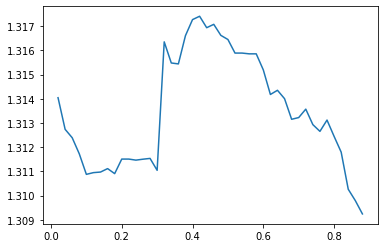

In [57]:
plt.plot(koch_thresh.keys(), koch_thresh.values())

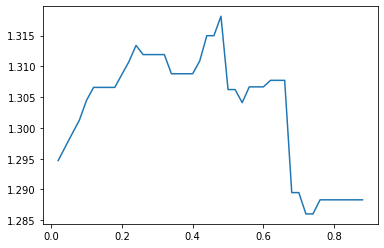

In [58]:
plt.plot(koch_50_thresh.keys(), koch_50_thresh.values())

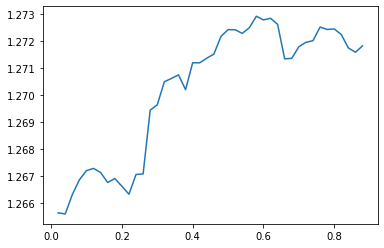

In [59]:
plt.plot(koch_curve_thresh.keys(), koch_curve_thresh.values())

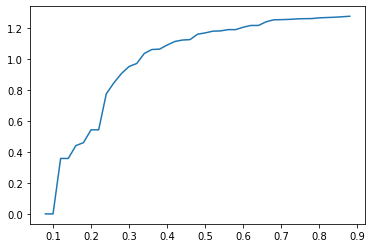

In [60]:
plt.plot(koch_curve_50_thresh.keys(), koch_curve_50_thresh.values())

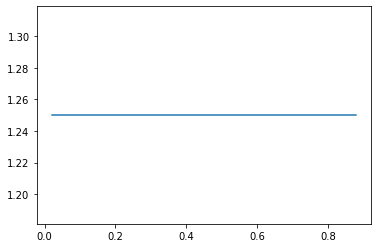

In [61]:
plt.plot(gb_thresh.keys(), gb_thresh.values())

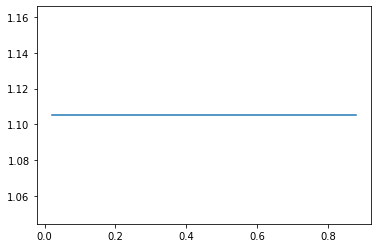

In [62]:
plt.plot(gb_50_thresh.keys(), gb_50_thresh.values())

### Showing Regression Plots of fractals

intercept: [11.20459123]
slope: [[-1.50851977]]


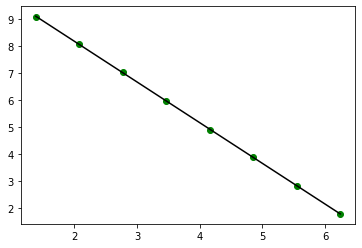

In [30]:
linreg(x, y)

In [31]:
coeff, x, y = start("./SelfSimilarFractals/greatbritain.png")
save_csv(x, y, "./csvs/greatbritain.csv")

Minkowski–Bouligand dimension (computed):  1.1896829330855272


intercept: [8.35180173]
slope: [[-1.25006712]]


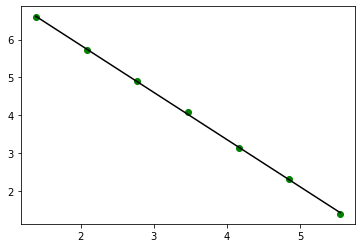

In [11]:
linreg(x,y)

### Union of Different Colours

In [13]:
ranges ={'Violet': [(150, 100, 100), (180, 255, 255)],
 'Indigo': [(135, 100, 100), (150, 255, 255)],
 'Blue': [(90, 100, 100), (135, 255, 255)],
 'Green': [(35, 100, 100), (90, 255, 255)],
 'Yellow': [(25, 100, 100), (35, 255, 255)],
 'Orange': [(10, 100, 100), (25, 255, 255)],
 'Red': [(0,100,100),(10,100,100)]}

In [12]:
def remove_colour(img, fname, col_min, col_max):
    upstate = cv2.imread(img)
    upstate_hsv = cv2.cvtColor(upstate, cv2.COLOR_BGR2HSV)

    mask_inverse = cv2.inRange(upstate_hsv, col_min, col_max)
    mask = mask_inverse #cv2.bitwise_not(mask_inverse)
    mask_rgb = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)    
    masked_upstate = cv2.bitwise_and(upstate, mask_rgb)
    
    gray = cv2.cvtColor(masked_upstate, cv2.COLOR_BGR2GRAY)

    ret, thresh = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY)

    masked_upstate[thresh == 255] = 0
    
    cv2.imwrite(fname, masked_upstate)
    
    
    

In [14]:

def remove_red(img, fname):
    image = cv2.imread(img)
    result = image.copy()
    result = cv2.cvtColor(result, cv2.COLOR_BGR2HSV)
    lower1 = np.array([0, 100, 20])
    upper1 = np.array([10, 255, 255])
    lower2 = np.array([160,100,20])
    upper2 = np.array([179,255,255])

    lower_mask = cv2.inRange(result, lower1, upper1)
    upper_mask = cv2.inRange(result, lower2, upper2)

    full_mask = lower_mask + upper_mask;

    result = cv2.bitwise_and(result, result, mask=full_mask)
    upstate_hsv = cv2.cvtColor(result, cv2.COLOR_BGR2HSV)
    mask_rgb =upstate_hsv #cv2.bitwise_not(upstate_hsv)
    masked_upstate = cv2.bitwise_and(image, mask_rgb)
    
    gray = cv2.cvtColor(masked_upstate, cv2.COLOR_BGR2GRAY)

    ret, thresh = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY)

    masked_upstate[thresh == 255] = 0
    
    
    cv2.imwrite(fname, masked_upstate)


In [15]:
def main_run(main_img):
    for i in ranges.keys():
        if i == "Red":
            remove_red('./GivenClusters/{}.png'.format(main_img), "./colours/{}/red.png".format(main_img))
        else:
            mini = np.array((ranges[i])[0], np.uint8)
            maxi = np.array((ranges[i])[1], np.uint8)
            remove_colour('./GivenClusters/{}.png'.format(main_img), "./colours/{}/without{}.png".format(main_img, i), mini, maxi)

In [16]:
main_run("turnerimg")

In [17]:
main_run("ALE_a0_eta0_sigmad_n8000")

### Inverting Colours

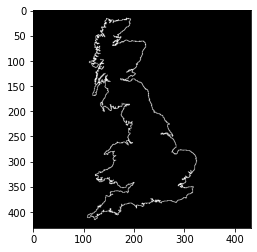

In [58]:
plt.imshow(img)

In [259]:
coeff, x1, y1 = start("./SelfSimilarFractals/invertedGB_w_trans.jpg", 0.5)

Minkowski–Bouligand dimension (computed):  1.2839164765304605


In [260]:
coeff, x2, y2 = start("./SelfSimilarFractals/invertedGB.jpg", 0.5)

Minkowski–Bouligand dimension (computed):  1.2500671175406615


### Transalting image and saving it to the directory.

In [19]:
import cv2
import numpy as np

img = cv2.imread("./SelfSimilarFractals/GreatBritain.png")
num_rows, num_cols = img.shape[:2]

img = cv2.bitwise_not(img)



translation_matrix = np.float32([ [1,0,10], [0,1,10] ])
img_translation = cv2.warpAffine(img, translation_matrix, (num_cols, num_rows))

gray = cv2.cvtColor(img_translation, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY)
#img_translation[thresh == 0] = 255
plt.imshow(img_translation)
cv2.imwrite("./SelfSimilarFractals/invertedGB_w_trans.jpg", img_translation)

'import threading\n\ndef do_something(): \n    print("Doing stuff...")\n    # do your stuff\n    threading.Timer(0.1, do_something).start()\n\ndo_something()'

### Turning saved csv files (of clusters) into reproducible plots, 
## {In BETA developement}

In [150]:
def get_centers(co_ordinates):
    co_ords = []
    for i  in co_ordinates:
        co_ords.append((((i[0]+i[2])/2), ((i[1]+i[3])/2)))
    plt.gca().invert_yaxis()
    plt.gca().set_aspect('equal', adjustable='box')
    #print(co_ords)
    plt.scatter(*zip(*co_ords), s= 100)
    #return co_ords

In [153]:
with open('./ClusterCSV/6.csv', newline='') as f:
    reader = csv.reader(f)
    data = list(reader)
data = data[1:]
data = [tuple(int(float(j)) for j in i) for i in data]
#data

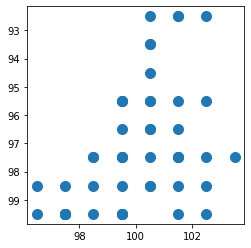

In [154]:
get_centers(data)

In [141]:
co_ords = [(99.5, 99.5), (99.5, 100.5), (99.5, 99.5), (100.5, 101.5), (101.5, 102.5), (99.5, 100.5), (100.5, 99.5), (100.5, 102.5), (100.5, 103.5), (100.5, 102.5), (100.5, 100.5), (101.5, 99.5), (98.5, 98.5), (102.5, 103.5), (102.5, 100.5), (98.5, 100.5), (97.5, 101.5), (102.5, 104.5), (97.5, 100.5), (102.5, 105.5), (99.5, 104.5), (102.5, 99.5), (98.5, 97.5), (102.5, 105.5), (98.5, 101.5), (102.5, 100.5), (101.5, 98.5), (97.5, 102.5), (99.5, 102.5), (97.5, 96.5), (103.5, 103.5), (96.5, 95.5), (100.5, 104.5), (98.5, 96.5), (103.5, 103.5), (96.5, 96.5), (100.5, 102.5), (101.5, 105.5), (102.5, 97.5), (98.5, 95.5), (102.5, 104.5), (97.5, 95.5), (99.5, 99.5), (103.5, 106.5), (100.5, 98.5), (102.5, 103.5), (102.5, 104.5), (97.5, 96.5), (99.5, 95.5), (102.5, 97.5), (102.5, 102.5), (96.5, 96.5), (97.5, 100.5), (102.5, 99.5), (102.5, 102.5), (102.5, 98.5), (103.5, 96.5), (97.5, 102.5), (102.5, 98.5), (95.5, 97.5), (95.5, 96.5), (99.5, 105.5), (101.5, 104.5), (102.5, 104.5), (97.5, 103.5), (103.5, 96.5), (102.5, 105.5), (96.5, 94.5), (97.5, 95.5), (99.5, 105.5), (104.5, 97.5), (98.5, 96.5), (103.5, 107.5), (104.5, 98.5), (97.5, 95.5), (101.5, 104.5), (95.5, 94.5), (100.5, 97.5), (98.5, 105.5), (105.5, 97.5), (102.5, 108.5), (97.5, 105.5), (96.5, 104.5), (97.5, 94.5), (94.5, 96.5), (101.5, 109.5), (95.5, 95.5), (98.5, 93.5), (103.5, 106.5), (99.5, 92.5), (101.5, 105.5), (97.5, 93.5), (102.5, 107.5), (98.5, 91.5), (95.5, 103.5), (94.5, 95.5), (101.5, 109.5), (101.5, 106.5), (101.5, 108.5), (103.5, 109.5), (93.5, 95.5), (94.5, 104.5), (94.5, 105.5), (95.5, 106.5), (104.5, 110.5)]

In [146]:
a = co_ords[-1]

In [147]:
b = co_ords[-6]

In [148]:
sum([(aItem -bItem)**2 for aItem, bItem in zip(a, b)])

2.0